# Homework 3 (Mathematical and Computational Foundations of Data Science)
- Instructor: [Sina Hazratpour](https://sinhp.github.io)
- Zulip server: [mcfds.zulipchat.com](https://mcfds.zulipchat.com)


## Homework Policies
Homework should be submitted through Gradescope. The code needed to access gradescope was sent via e-mail.

All answers should be fully motivated, with logically complete arguments and motivations. No late homework will be accepted. 

All submitted homework must be written up individually without consulting anyone else’s written solution.

The submission of homework that require coding needs to be fully commented, the inputs and and outputs (text and/or figures) clearly explained. Both the correctness of the code and the clarity of comments will contribute to the grade you receive. Often the commenting is more extensive than the code itself. You should discuss the outputs of your code, critically and as needed in order to answer specific questions in the problems, so that the questions are fully answered. Outputs without comments/discussion will not be counted.




## Problem 1 

1. Show that for all $ m \times n $ matrices we have 
$$ \| A \|_\mathrm{F} \le \sqrt{\mathrm{rank}(A)} \,   \| A  \|_2 \le \sqrt{m \, \mathrm{rank}(A)}  \| A \|_\infty $$  
2. Given an SVD factorization $A = U \Sigma V^*$, define a sequence  $\{ \tilde{A_k}\}_{k \in \mathbb{N}}$ of matrices where $$\tilde{A_k} = U \left( \Sigma + \frac{1}{k} \, \tilde{I}_{m\times n} \right) V^* \, .$$ 
Here the matrix $\tilde{I}_{m\times n}$ is rectangular analogue of the identity square matrix: the $ij$ entry of $\tilde{I}$ is given by the Kronecker $\delta_{ij}$. Show that every $\tilde{A}_k$ is a full rank matrix. 
Prove that the sequence $\tilde{A_k}$ converges to $A$ with respect to the 2-norm, that is for each positive $\epsilon$, no matter how small, there is some natural number $N$ such for all indices $k \ge N$, we have $\| A - \tilde{A}_k  \|_2 \le \epsilon$.   
3. Using one of the inequalities you proved in the first part, show that the sequence $\tilde{A_k}$ converges to $A$ with respect to the Frobenius norm as well. 
4. Argue why the last two parts imply that the set of full-rank $m \times n$ matrices is a dense subset of $\mathbb{C}^{m\times n}$. 



# Answer 1
1) The Frobeninus norm is the sum of all the entires squared and squareroted which is also equal to the sum of the squares of the singular values of A. The 2 Norm is expressed as the square root of the largest eigen value aka the singular value. Naturally, the sum of all singular values squared and squarerooted (given that there is only one with the greatest singular value magntiude, namely sigma 1) is going to be less then or equal to the root of the rank of A (which reperents the total number of singular values squared). As far as I can tell, the value of A under the infinite norm is also equal to the largest singular value in the SVD of A like the two-norm, so its clear to see that root m * rank(A) would be greater or equal to just root rank (A) since m is not negative (it's the dimension of A so its non-negative).

2) To prove it's a full rank matrix, we can recognize some key factors. First, Σ is an diagonal matrix with postive diagonal matrix. Adding 1\k * Idenity matrix won't change the rank of Σ so, the result is still the same rank as Σ. As Σ has the same rank as the Σ from A and A has a full SVD factorazation, then Σ will also have the same rank as A which means Ak is full rank.

For the second part of the problem:
|A - Ak|_2 =  ∣(UΣV∗−U(Σ+ 1/k I)V*)|_2 = |U(1\k I)V*|_2 

Using the sub-multiplicative property of norms: |AB|_2 ≤ |A|_2|B|_2
Also notice that the norms of a unitary matrix are 1

|U(1\k I)V*|_2 ≤ 1/k |I|_2 

1/k |I|_2 = 1/k * 1/sqrt(min m, n) from the defenition of eucledian norm.

So then if we choose an N to be any number greater then 1/k * 1/sqrt(min between m and n) for all K ≥ N, then we have what is required.

3) Using the first inequality: |A|_F ≤ sqrt(rank(A)) |A|_2

Using the same sub-multiplicative property:
|A - Ak|_F = ∣(UΣV∗−U(Σ+ 1/k I)V*)|_F ≤ 1\k |I|_F as again U and V are unitary.

As |I|_F = trace(I* I) = sqrt(mn) 

|A - Ak|_F ≤ 1\k sqrt(mn)

Now using this fact, we can see that it converges to A for the frobenius norm as well.


4)

Any matrix in this subset can be the sum of a full-rank matrix and a rank-deficient matrix.
Using 2 and 3, we know that the full-rank matrix A converges to Ak by both the two norm and the frobenius norm. 


## Problem 2 

Here's an advanced warning that the text of this problem is going to be long, but don't worry! The length of this problem does not reflect the level of its difficulty. The problem contains excessive commentary to guid you through it.  The problem also has 9 parts, but the answers to most parts are rather short. 

Divide the unit circle $S^1$ in $n$ equal intervals, using the $n$ equi-spaced points $\mathbb{S}_n^1 := \{x_i \}_{i=0}^{n-1}$ listed clockwise. You may also think of this as starting with the unit interval $[0, 1]$, discretized at equally-spaced points $x_0 = 0, x_1 = \frac{1}{n−1} , \ldots , x_i = \frac{i}{n−1} ,...,x_{n−1} = \frac{n−2}{n−1}$, and then bending the interval into a circle, glueing the points $0$ and $1$. Also we will consider the points as having indices modulo n, meaning that $x_{n+i} = x_i$ for $i=0, 1, 2, $ and so on . So, for example, $x_n = x_0, x_{n+1} = x_1, x_{−1} = x_{n−1}$.

We now consider functions from the discretized circle $\mathbb{S}_n^1$ to the real number line $\mathbb{R}$. We can also think of these functions as functions on the discretized unit interval that “wrap around” when reaching $0$ (from the right) and $1$ (from the left). A function $f \colon \mathbb{S}_n^1 \to \mathbb{R}$ is easily represented as a n-dimensional vector, namely the vector of function values $\big(f(x_1),...,f(x_n)\big)^T$. These functions form an n-dimensional linear space, which is equivalent to $\mathbb{R}^n$, endowed with the standard inner product and Euclidean norm.

1. Given two functions $f_1, f_2 \colon \mathbb{S}_n^1 \to \mathbb{R}$ write down a formula for their inner product, and for the norm of one of them, and compare to both the Euclidean inner product in Rn and to the $L^2$ inner products we defined in class (for example on continuous functions, or square-integrable functions, on $[0, 1]$).


2. Consider the function $f_0 = 1 e_1 + \ldots, 1 e_k + 0 e_{k+1} + \ldots + 0 e_n$, where $e_i$ are the standard basis for $\mathbb{R}^n$ and where the first $k$ coefficient are $1$ and the rest are $0$.  Then define $n$ functions $f_i$ according to the assignment $f_i(x_j) = f_0(x_{j−i})$, for $i = 0, \ldots , n − 1$. Note that $f_i$ is $f_0$ translated to the right (i.e. clockwise) on the interval (with “wrap-around”) on $\mathbb{S}_n^1$ by $i$ points. Plot (on the unit circle $\mathbb{S}_n^1$ or on the discretized interval $[0,1]$) the graphs of $f_1$ and $f_4$ for $n = 6$ and $k = 3$.

3. Compute the mean $\mu$ of the functions $f_0, . . . , f_{n−1}$ and plot the graph of the mean function for $n = 6$ and $k = 3$.

Consider the centered functions $\overline{f_i} = f_i − μ$, represented as vectors as above. Stack the $n$ vectors $\overline{f_i}$ as columns of an $n \times n$  matrix $F(k,n)$ depending on parameter $k$ and $n$. 

4. Describe the matrix that you obtain, and any special pattern you observe in this matrix, and describe the dependency of $F$ on $k$ and $n$ (i.e. how it would change upon changing $k$ and $n$).

5. Write an algorithm in Python which constructs the matrix $F(k,n)$ and compute its SVD, for $k=3$ and $n=6$. 
6. What can you say about the unitary matrices $U$ and $V$ in SVD? Are they the same/similar/not similar, and why?
7. Plot several of the columns of $U$ as functions on the discretized interval, and similarly for the columns of $V$ (if you think it is necessary). How do they look like? Can you give an exact or approximate analytic expression for these eigenvectors?
8. How do the eigenvectors change with varying $n$ and $k$?
9. What about the singular values? Plot them for multiple values of $n$ and $k$ and comment on how they behave for a fixed $n$ and $k$ (as a function of the index of the singular value), and across multiple choices of $n$ and $k$.

# Part 1
 <f1, f2> = 1\n Σ f1(xi)f2(xi)
norm of f1:
|f1| = sqrt(1\n Σ f1(xi)^2)

Comparing it to the Eucledian Inner Product, it seems like they both are very similar.  However, the L^2 inner product is integratable while the inner product here isn't necescarily integratable.


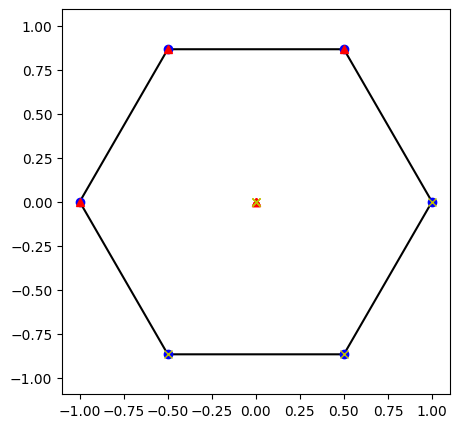

In [248]:
# Part 2
import matplotlib.pyplot as plt 
import numpy as np

k = 3
n = 6
# Create an array which has first k as 1 and rest as 0 as coefficents
f0 = np.concatenate((np.ones(k), np.zeros(n-k)))
f1 = np.roll(f0, 1)
f4 = np.roll(f0, 4)
# Plot the functions on the unit circle
theta = np.linspace(0, 2*np.pi, n+1)
#unitCircle = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(5,5))
plt.plot(np.cos(theta), np.sin(theta), 'k')
plt.plot(np.cos(theta[:-1]), np.sin(theta[:-1]), 'bo', label=r'$x_j$')
plt.plot(np.cos(theta[:-1]) * f1, np.sin(theta[:-1]) * f1, 'r^', label=r'$f_1$')
plt.plot(np.cos(theta[:-1]) * f4, np.sin(theta[:-1]) * f4, 'yx', label=r'$f_4$')
plt.axis('equal')
plt.show()

#Part 3

# Part 3

The mean of each is defined as: mean(fj) = 1\n Σ fj(xi) 
As k is 3, then 3 terms are 1 and as n is 6, there are 3 terms which are 0.

So mean = 3/6 = 1/2 for all f0 as f0 -> f5 are the same function just shifted


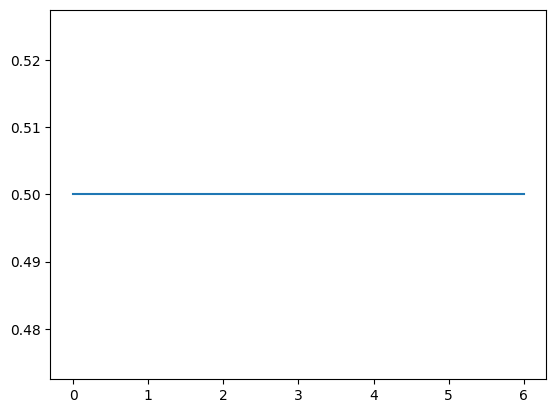

In [249]:
# Part 3 plot

mean = k/n # Represents the value of mean

x = range(n + 1)
y = [mean] * (n + 1)
plt.plot(x, y)

# Part 4
As the function takes the unit circle into account and take it into the number line, it can be said that the rows of the matrix represent the values of this new centered function at a differenet part of the circle while the coloums are the function value for all various positions in the circle.

A special property of the circle should be that all the rows sum up to zero. This is because the function is subtracted by the mean value so it equals to zero at the end.

The matrix does depend on k and n as they create the function which we use to construct this matrix. As k increases, the number of functions on the circle increaes. And while n increases the number of points on the circle increases (the number of rows).

# Part 5

In [250]:
# Part 5

f0 = np.concatenate((np.ones(k), np.zeros(n-k)))

for i in range (n):
    f0[i] = f0[i] - n/k


fMatrix = []
for i in range(n):
    fi = np.roll(f0, i)
    fMatrix.append(fi)

F = np.column_stack(fMatrix)

U, s, V_T = np.linalg.svd(F)

VTrans = V_T.transpose()

print(U, "\n\n", V_T)



[[-4.08248290e-01 -2.88675135e-01  5.00000000e-01 -4.08248290e-01
   5.73152867e-01  6.94919052e-02]
 [-4.08248290e-01 -5.77350269e-01 -2.63677968e-16  4.08248290e-01
  -2.26394678e-01 -5.31110895e-01]
 [-4.08248290e-01 -2.88675135e-01 -5.00000000e-01 -4.08248290e-01
  -3.46758189e-01  4.61618990e-01]
 [-4.08248290e-01  2.88675135e-01 -5.00000000e-01  4.08248290e-01
   5.73152867e-01  6.94919052e-02]
 [-4.08248290e-01  5.77350269e-01  5.55111512e-16 -4.08248290e-01
  -2.26394678e-01 -5.31110895e-01]
 [-4.08248290e-01  2.88675135e-01  5.00000000e-01  4.08248290e-01
  -3.46758189e-01  4.61618990e-01]] 

 [[ 4.08248290e-01  4.08248290e-01  4.08248290e-01  4.08248290e-01
   4.08248290e-01  4.08248290e-01]
 [-5.77350269e-01 -2.88675135e-01  2.88675135e-01  5.77350269e-01
   2.88675135e-01 -2.88675135e-01]
 [ 2.40885087e-16 -5.00000000e-01 -5.00000000e-01 -2.77555756e-17
   5.00000000e-01  5.00000000e-01]
 [-4.08248290e-01  4.08248290e-01 -4.08248290e-01  4.08248290e-01
  -4.08248290e-01  4.

# Part 6
No they are not the same. This is due to how the U and V^T are constructed. U represents the left signular vectors and V consists of the right singular vectors of the matrix. Therefore, they aren't necesscarily going to be the same even though they are both orthonormal.

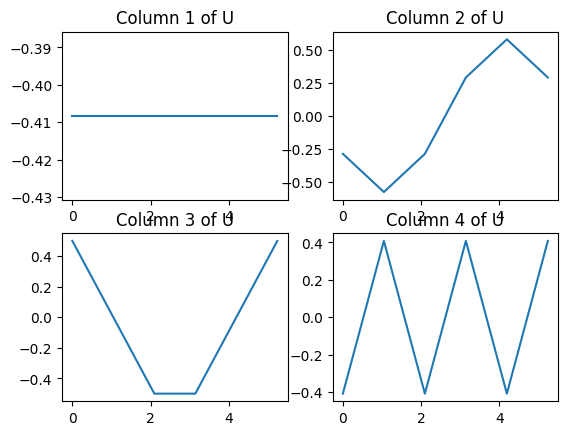

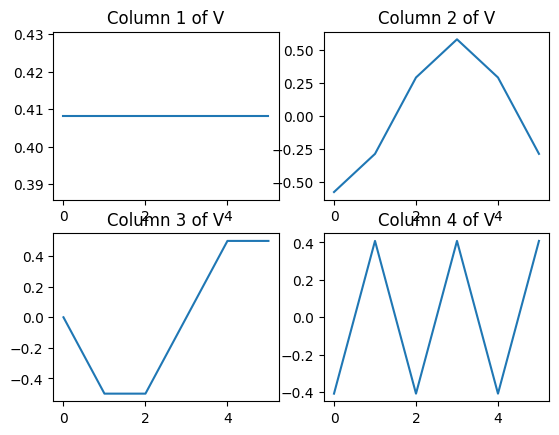

[[ 0.10500525+0.24000726j  0.10500525-0.24000726j  0.09902673-0.49703949j
   0.09902673+0.49703949j -0.07304698+0.41131496j -0.07304698-0.41131496j]
 [ 0.05231411-0.22457518j  0.05231411+0.22457518j  0.07675471+0.3687362j
   0.07675471-0.3687362j   0.0355044 +0.5510998j   0.0355044 -0.5510998j ]
 [-0.20682143+0.22802416j -0.20682143-0.22802416j  0.17750697+0.18730118j
   0.17750697-0.18730118j -0.58192733+0.j         -0.58192733-0.j        ]
 [-0.1029497 -0.57544405j -0.1029497 +0.57544405j -0.0203182 -0.27699112j
  -0.0203182 +0.27699112j -0.28424567-0.01824821j -0.28424567+0.01824821j]
 [ 0.27171686-0.0939768j   0.27171686+0.0939768j   0.62459881+0.j
   0.62459881-0.j          0.05712877-0.15476091j  0.05712877+0.15476091j]
 [-0.59919391+0.j         -0.59919391-0.j          0.24951391-0.07196902j
   0.24951391+0.07196902j  0.26590385+0.05315145j  0.26590385-0.05315145j]] 

 [[ 0.32899043+0.j         -0.59362796+0.j         -0.59362796-0.j
  -0.04795485+0.29666299j -0.04795485-0.29666

In [251]:
# Part 7
theta = theta[:-1]
x = np.cos(theta)
y = np.sin(theta)

fig, axs = plt.subplots(nrows = 2, ncols = 2)
axs = axs.ravel()
for i in range(4):
    axs[i].plot(theta, U[:, i])
    axs[i].set_title(f"Column {i + 1} of U")

plt.show()


fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.ravel()
for i in range(4):
    axs[i].plot(np.arange(n), V_T[i, :])
    axs[i].set_title(f"Column {i + 1} of V")

plt.show()
eigenvalues, eigenvectors = np.linalg.eig(U)
eigenvalues2, eigenvectors2 = np.linalg.eig(V_T)
print(eigenvectors, "\n\n", eigenvectors2)



# Part 7
How they look like is above. 

The eigenvectors form an orthonormal basis. The eigenvectors seemingly also take up some Complex Characteristics. Otherwise, I don't know how to read them

[[-0.02184227-0.12081655j -0.02184227+0.12081655j  0.06326268+0.4111216j
   0.06326268-0.4111216j  -0.05151184-0.33727931j -0.05151184+0.33727931j
  -0.25021142-0.31312157j -0.25021142+0.31312157j  0.14367724-0.11915669j
   0.14367724+0.11915669j]
 [ 0.02923977-0.11511123j  0.02923977+0.11511123j  0.15847297-0.40063293j
   0.15847297+0.40063293j  0.10456513+0.15657321j  0.10456513-0.15657321j
  -0.07003966-0.46268716j -0.07003966+0.46268716j  0.10355799-0.18739199j
   0.10355799+0.18739199j]] 

 [[ 0.05664637+0.17782523j  0.05664637-0.17782523j -0.1638897 +0.09067905j
  -0.1638897 -0.09067905j -0.51254633+0.j         -0.51254633-0.j
  -0.10809733+0.09053903j -0.10809733-0.09053903j -0.37532017+0.08145879j
  -0.37532017-0.08145879j]
 [-0.19008944-0.08099771j -0.19008944+0.08099771j -0.01771408-0.34192875j
  -0.01771408+0.34192875j  0.01179025-0.12747154j  0.01179025+0.12747154j
  -0.09595537+0.44257952j -0.09595537-0.44257952j  0.050301  +0.34069644j
   0.050301  -0.34069644j]]


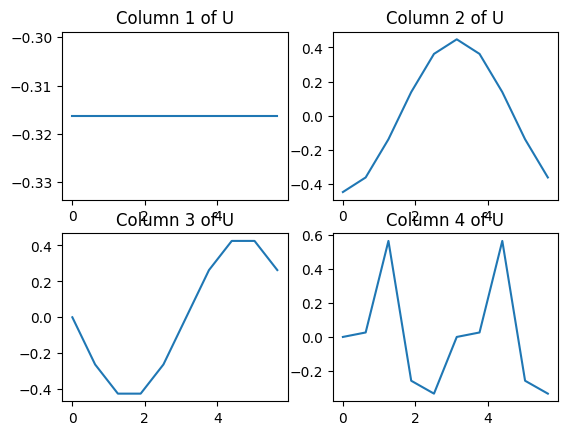

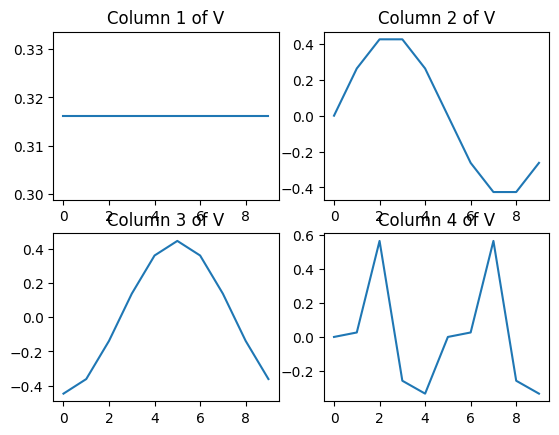

In [252]:
# Part 8 Testing

n = 10
k = 6

# Make the f0 vector
f0 = np.concatenate((np.ones(k), np.zeros(n-k)))

# Calculate the centered vector
for i in range (n):
    f0[i] = f0[i] - n/k

# Create the fmatrix
fMatrix = []
for i in range(n):
    fi = np.roll(f0, i)
    fMatrix.append(fi)

F = np.column_stack(fMatrix)

U, s, V_T = np.linalg.svd(F)

VTrans = V_T.transpose()

theta = theta = np.linspace(0, 2*np.pi, n+1)[:-1]
x = np.cos(theta)
y = np.sin(theta)

fig, axs = plt.subplots(nrows = 2, ncols = 2)
axs = axs.ravel()
for i in range(4):
    axs[i].plot(theta, U[:, i])
    axs[i].set_title(f"Column {i + 1} of U")

#plt.show()


fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.ravel()
for i in range(4):
    axs[i].plot(np.arange(n), V_T[i, :])
    axs[i].set_title(f"Column {i + 1} of V")

#plt.show()

eigenvalues, eigenvectors = np.linalg.eig(U)
eigenvalues2, eigenvectors2 = np.linalg.eig(V_T)

print(eigenvectors[:2], "\n\n", eigenvectors2[:2])



# Part 8

It appears that as n increases the graph smoothes out while as k increases, the graphs appear to become more of a sin wave and not as sharp.

# Part 9

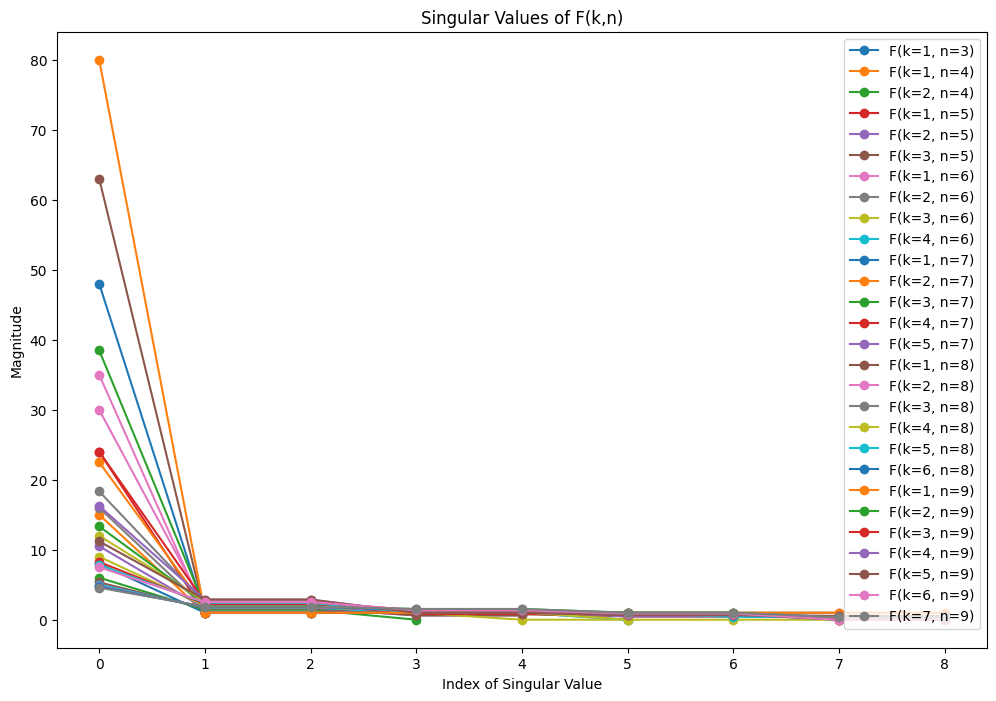

In [253]:
# define ranges of n and k


# plot singular values for different n and k
fig, ax = plt.subplots(figsize=(12, 8))
for n in range(1, 10):
    for k in range(1, n-1):
        # Make the f0 vector
        f0 = np.concatenate((np.ones(k), np.zeros(n-k)))

        # Calculate the centered vector
        for i in range (n):
            f0[i] = f0[i] - n/k

        # Create the fmatrix
        fMatrix = []
        for i in range(n):
            fi = np.roll(f0, i)
            fMatrix.append(fi)

        F = np.column_stack(fMatrix)

        # compute singular values of F
        U, S, V = np.linalg.svd(F)

        # plot singular values
        ax.plot(S, 'o-', label="F(k={}, n={})".format(k, n))

# Set Plot Tittle and Labels
ax.set_title("Singular Values of F(k,n)")
ax.set_xlabel("Index of Singular Value")
ax.set_ylabel("Magnitude")
ax.legend()

plt.show()

# Part 9
As we can see, it appears that the signular values do change with n and k. As n is fixed, then the difference between the first signular value and the second appears to increase. For fixed k, the increase of n cause the difference to decrease. 

In general, it appears that the difference between the first and second singular value isn't to much (just 10 but is much MUCH larger then the other jumps between singular values).

## Problem 3

The goal of this exercise is to do PCA analysis to the following dataset consists of 70 000 records of patients data including 11 features: 

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

There are 7000 rows in the dataset.

1. Create a new data set extracting only the following features: 
age, height, weight, systolic blood pressure(ap_hi), diastolic blood pressure (ap_lo), cholesterol 

2. Randomly select 500 rows of this data set and form the corresponding matrix. 

3. Form the $6 \times 6$ covariance matrix. Which features/variables are significantly correlated? 

3. Carry out the PCA. What are the first two largest components (i.e. the first two right singular vectors)? Which features contribute the most to the largest PCA component?  

In [254]:
import pandas as pd
import numpy as np

# Import the data with pandas and choose the cols  we are going to use
cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol']
df = pd.read_csv("cardio_train.csv", delimiter=";", usecols = cols)

# Sample 500 random rows
df = df.sample(n=500)

# Standarize the Matrix so that the covariance matrix has the diagonals to be 1. 
dfStandarized = (df - df.mean()) / df.std()
    
# Calculate covariance matrix 
covarianceMatrix = np.cov(dfStandarized.T)

eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)

# print(covarianceMatrix)
# It appears that the second and third are pretty correlated (0.3004), fourth and fifth (2.2425) and third and sixth (0.230) being the top three correlations

# Sort the eigenValues to find the two largest components which would have the largest eigenvalues
sortedOrder = eigenValues.argsort()[::-1]
sortEigenValues = eigenValues[sortedOrder]
sortEigenVectors = eigenVectors[sortedOrder]

# Pick out the top 2 eigenvectors
topTwoSingular = sortEigenVectors[:,:2]
#Top 2 Singular Vectors. This is an output that is generated, however this obviously changes a bit by the sample we choose
#[[ 0.09941198 -0.46106073]
 #[-0.6238709   0.33339807]
 #[-0.27528658 -0.17827001]
 #[-0.06502564 -0.68696014]
 #[-0.2322704  -0.40394446]
 #[-0.68333139 -0.09696995]]

print(topTwoSingular)

# Compute the new matrix with the two PCA vectors applied to it
new_matrix = dfStandarized @ topTwoSingular

# Compute the loadings 
loadings = pd.DataFrame({'Feature': df.columns, 'Loading': topTwoSingular[:, 0]})

# Sort the loadings by absolute value in descending order to find the largest feature
loadings = loadings.iloc[abs(loadings['Loading']).argsort()[::-1]]

# Print which feature is the largest
print("Feature which contributes the most is:" ,loadings.iloc[0][0])

[[ 0.46315469 -0.25995697]
 [-0.18202776  0.67678308]
 [ 0.19399402  0.67280712]
 [ 0.58060095  0.13681849]
 [ 0.36833825  0.03400432]
 [ 0.49188354  0.04291871]]
Feature which contributes the most is: ap_hi
